# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
## YOUR CODE HERE ##
train_transform = transforms.Compose([
            transforms.RandomRotation(20),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])

valid_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])

# Create training set and define training dataloader
## YOUR CODE HERE ##
valid_size = 0.2
train_dataset = torchvision.datasets.MNIST('MNIST_Data', train=True, 
                download=True, transform=train_transform)

valid_dataset = torchvision.datasets.MNIST('MNIST_Data', train=True, 
                download=True, transform=valid_transform)
    
num_train = len(train_dataset)
indices = list(range(num_train))
split = int(np.floor(valid_size * num_train))

random_seed = 40
np.random.seed(random_seed)
np.random.shuffle(indices)

train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_dataset, 
                    batch_size=256, sampler=train_sampler)

valid_loader = torch.utils.data.DataLoader(valid_dataset, 
                    batch_size=256, sampler=valid_sampler)
    
# Create test set and define test dataloader
## YOUR CODE HERE ##
testset = torchvision.datasets.MNIST('MNIST_data/', download=True, train=False, transform=valid_transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=True)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**Image Augmentation** 
RandomRotation and HorizationFlip transforms are applied to images in training dataset. These transform should randomly rotate images upto 20 degree and flip the images horizontally. These transform are applied to reduce the overfitting in image data. Real world images may not come in perfect representation. Real world images from OCR application can have letters twisted, rotated and could be flipped as well. Accounting for these Transform ensures model does not memorize the exact representation of these images. Applying transforms makes model learn varied distribution of images. 

**Normalization** 
Normalization is applied to training, validation and testing dataset images so that model can reach convergence sooner while training. 

**Tensor conversion**
ToTensor() is applied to all datasets to convert the datasets into tensor representation 

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

5


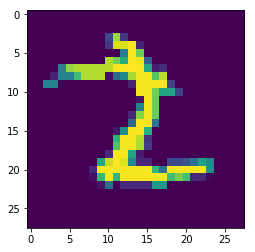

5


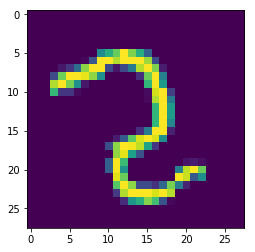

1


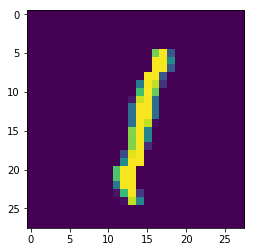

9


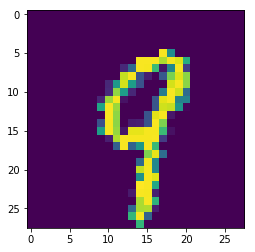

4


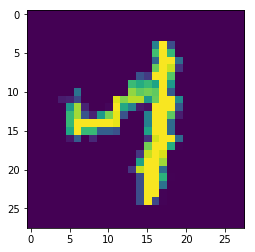

In [4]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

8


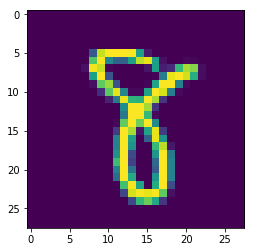

5


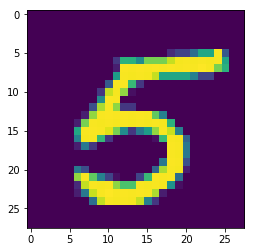

5


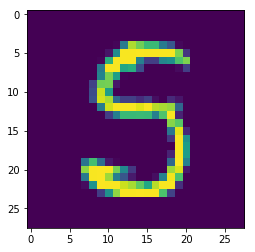

7


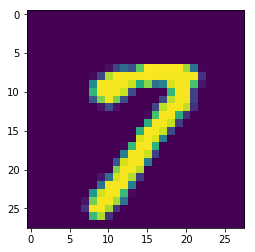

4


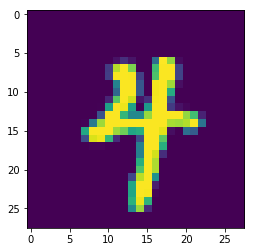

In [31]:
show5(test_loader)

In [37]:
dataiter = iter(train_loader)
    
batch = next(dataiter)
images = batch[0][0:5]

print("Train Image size: ", images.size()) 
print("Number of Training Batches: ", len(dataiter))

Train Image size:  torch.Size([5, 1, 28, 28])
Number of Training Batches:  188


In [38]:
dataiter = iter(test_loader)
    
batch = next(dataiter)
images = batch[0][0:5]

print("Test Image size: ", images.size())
print("Number of Testing Batches: ", len(dataiter))

Test Image size:  torch.Size([5, 1, 28, 28])
Number of Testing Batches:  40


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [5]:
## YOUR CODE HERE ##
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Define neural network layers
        self.fc1 = nn.Linear(784,300)
        self.fc2 = nn.Linear(300,10)
   
    def forward(self,x):
        '''Forward pass through the network and returns ouput logits'''
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        
        return x
    
    def predict(self, x):
        '''This function predicts the classes by calculating softmax'''
        # x = torch.flatten(x, 1)
        logits = self.forward(x)
        return F.softmax(logits,dim=1)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [6]:
## YOUR CODE HERE ##
model = Network()
optimizer = optim.Adam(model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [11]:
## YOUR CODE HERE ##
def train(epochs, model, train_loader, valid_loader):
    
    training_loss = []
    training_acc = []
    validation_loss = []
    validation_acc = []

    #Move model to GPU
    if torch.cuda.is_available():
        model.cuda()

    epochs = epochs
    #step = 0
    #print_every = 100 
    trainloss = 0
    trainaccuracy = 0

    for e in range(epochs):
    
        # Model in training mode
        model.train()
    
        for inputs,labels in iter(train_loader):
            #step += 1    
        
            optimizer.zero_grad()
        
            #Move input and labels to GPU
            if torch.cuda.is_available():
                inputs = inputs.cuda()
                labels = labels.cuda()
        
            inputs = inputs.view(inputs.shape[0], -1)
            outputs = model.forward(inputs)
            trainloss = criterion(outputs,labels)
            trainloss.backward()
            optimizer.step()
        
            # Training Loss
            trainloss += trainloss.data[0]
        
            # Output will be exp of logmax 
            trainps = torch.exp(outputs).data
                
            # Take max probability and compare with label class 
            trainequality = (labels.data == trainps.max(1)[1])
                
            # Calculate accuracy mean on training batch.  
            trainaccuracy += trainequality.type_as(torch.FloatTensor()).mean()
        
    
        # Model in inference mode
        model.eval()
        validloss = 0 
        validaccuracy = 0 
            
        for inputs, labels in iter(valid_loader):
            
            # Move input and label to GPU
            if torch.cuda.is_available():
                inputs = inputs.cuda()
                labels = labels.cuda()
            
            inputs = inputs.view(inputs.shape[0], -1)
            outputs = model.forward(inputs)
            validloss += criterion(outputs,labels).data[0]
                
            # Output will be exp of logmax 
            validps = torch.exp(outputs).data
                
            # Take max probability and compare with label class 
            validequality = (labels.data == validps.max(1)[1])
                
            # Calculate accuracy mean on validation batch.  
            validaccuracy += validequality.type_as(torch.FloatTensor()).mean()
                
                
            
        print("\nEpoch: {}/{}.. ".format(e, epochs))
        print("Training Loss: {:.4f}".format(trainloss.data[0]/len(train_loader)))
        print("Training Accuracy: {:.4f}".format(trainaccuracy/len(train_loader)))
        print("Validation Loss: {:.4f}.. ".format(validloss/len(valid_loader)))
        print("Validation Accuracy: {:.4f}".format(validaccuracy/len(valid_loader)))

        training_loss.append(trainloss.data[0]/len(train_loader))
        training_acc.append((trainaccuracy/len(train_loader)))
        validation_loss.append((validloss/len(valid_loader)))
        validation_acc.append((validaccuracy/len(valid_loader)))
            
            
        trainloss = 0
        trainaccuracy = 0
        # Make sure dropout is on for training
        model.train()
        
    print('Execution Finished')
    return training_loss, training_acc, validation_loss, validation_acc, model

In [12]:
training_loss, training_acc, validation_loss, validation_acc, model = train(5, model, train_loader, valid_loader)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Epoch: 0/5.. 
Training Loss: 0.0039
Training Accuracy: 0.8445
Validation Loss: 0.3413.. 
Validation Accuracy: 0.8971


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:81: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:86: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Epoch: 1/5.. 
Training Loss: 0.0038
Training Accuracy: 0.8847
Validation Loss: 0.2688.. 
Validation Accuracy: 0.9187

Epoch: 2/5.. 
Training Loss: 0.0028
Training Accuracy: 0.9065
Validation Loss: 0.2272.. 
Validation Accuracy: 0.9304

Epoch: 3/5.. 
Training Loss: 0.0015
Training Accuracy: 0.9175
Validation Loss: 0.2173.. 
Validation Accuracy: 0.9348

Epoch: 4/5.. 
Training Loss: 0.0029
Training Accuracy: 0.9208
Validation Loss: 0.1910.. 
Validation Accuracy: 0.9443
Execution Finished


Plot the training loss (and validation loss/accuracy, if recorded).

[]

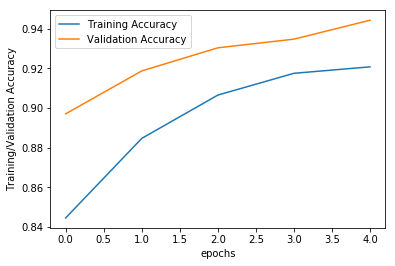

In [14]:
## YOUR CODE HERE ##
# Accuracy plots
epochs = 5
plt.plot(range(epochs), training_acc, label="Training Accuracy")
plt.plot(range(epochs), validation_acc, label="Validation Accuracy")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("Training/Validation Accuracy")
plt.plot()

[]

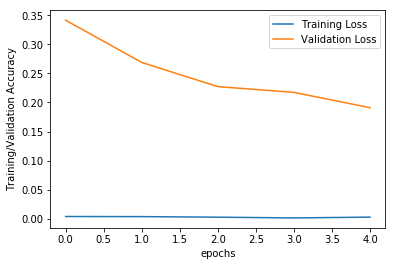

In [15]:
# Loss plots
epochs=5
plt.plot(range(epochs), training_loss, label="Training Loss")
plt.plot(range(epochs), validation_loss, label="Validation Loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("Training/Validation Accuracy")
plt.plot()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [16]:
## YOUR CODE HERE ##

def test(model, test_loader):
    testloss = 0 
    testaccuracy = 0 

    for inputs, labels in iter(test_loader):
    
        
        # Move input, labels and model to GPU
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()
            model = model.cuda()
    
        inputs = inputs.view(inputs.shape[0], -1)
        outputs = model.forward(inputs)
        #testloss += criterion(outputs,labels).data[0]
    
        testps = torch.exp(outputs).data
    
        # Take max probability and compare with label class
        testequality = (labels.data == testps.max(1)[1])
    
        # Calculate accuracy mean on validation batch.
        testaccuracy += testequality.type_as(torch.FloatTensor()).mean()
    
    print("Test Accuracy {:.4f}".format(testaccuracy/len(test_loader)))  

In [17]:
test(model, test_loader)

Test Accuracy 0.9450


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [22]:
## YOUR CODE HERE ##
# Increased the complexity of network by adding more hidden layer
# To reduce overfitting added dropout layer
# Increased the number of epochs

## YOUR CODE HERE ##
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Define neural network layers
        self.fc1 = nn.Linear(784,500)
        self.fc2 = nn.Linear(500,200)
        self.fc3 = nn.Linear(200,10)
        self.dropout = nn.Dropout(0.20)
   
    def forward(self,x):
        '''Forward pass through the network and returns ouput logits'''
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x
    
    def predict(self, x):
        '''This function predicts the classes by calculating softmax'''
        # x = torch.flatten(x, 1)
        logits = self.forward(x)
        return F.softmax(logits,dim=1)

In [23]:
model = Network()
optimizer = optim.Adam(model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

training_loss, training_acc, validation_loss, validation_acc, model = train(10, model, train_loader, valid_loader)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Epoch: 0/10.. 
Training Loss: 0.0055
Training Accuracy: 0.7494
Validation Loss: 0.4363.. 
Validation Accuracy: 0.8547


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:81: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:86: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Epoch: 1/10.. 
Training Loss: 0.0042
Training Accuracy: 0.8653
Validation Loss: 0.2804.. 
Validation Accuracy: 0.9117

Epoch: 2/10.. 
Training Loss: 0.0024
Training Accuracy: 0.8964
Validation Loss: 0.2109.. 
Validation Accuracy: 0.9302

Epoch: 3/10.. 
Training Loss: 0.0036
Training Accuracy: 0.9115
Validation Loss: 0.1915.. 
Validation Accuracy: 0.9381

Epoch: 4/10.. 
Training Loss: 0.0038
Training Accuracy: 0.9235
Validation Loss: 0.1547.. 
Validation Accuracy: 0.9507

Epoch: 5/10.. 
Training Loss: 0.0028
Training Accuracy: 0.9289
Validation Loss: 0.1482.. 
Validation Accuracy: 0.9531

Epoch: 6/10.. 
Training Loss: 0.0027
Training Accuracy: 0.9351
Validation Loss: 0.1485.. 
Validation Accuracy: 0.9517

Epoch: 7/10.. 
Training Loss: 0.0006
Training Accuracy: 0.9393
Validation Loss: 0.1367.. 
Validation Accuracy: 0.9564

Epoch: 8/10.. 
Training Loss: 0.0011
Training Accuracy: 0.9426
Validation Loss: 0.1254.. 
Validation Accuracy: 0.9596

Epoch: 9/10.. 
Training Loss: 0.0004
Training A

In [24]:
test(model, test_loader)

Test Accuracy 0.9559


## Saving your model
Using `torch.save`, save your model for future loading.

In [25]:
## YOUR CODE HERE ##

# Define checkpoint with parameters to be saved
checkpoint = {'input_size': 784,
              'output_size': 10, 
              'epochs': 10,
              'hidden_layer': [500,200],
              'learning_rate': 0.001,
              'state_dict': model.state_dict()}

#Save checkpoint
torch.save(checkpoint,'checkpoint.pth')